<a href="https://colab.research.google.com/github/wajeehafarooqi/Transfer-Learning/blob/main/CatsVSDog_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
mydir=r'/content/drive/MyDrive/Colab Notebooks/TLProjectCatsVSDogs/project3/Train'

In [4]:
categories = ['cats','dogs']

In [207]:
data = []
for i in categories:
  folder_path = os.path.join(mydir,i)
  label = categories.index(i)
  for j in os.listdir(folder_path):
    try:
      img_path = os.path.join(folder_path,j)
      img = cv2.imread(img_path)
      img_new = cv2.resize(img,(150,150))
      data.append([img_new,label])
    except Exception as e:
      pass
    

In [208]:
random.shuffle(data)

In [209]:
X = []
y = []
for i in data:
  y.append(i[1])
  X.append(i[0])
    

In [210]:
X =np.array(X)

In [211]:
y = np.array(y)

In [212]:
X.shape

(2006, 150, 150, 3)

In [213]:
y.shape

(2006,)

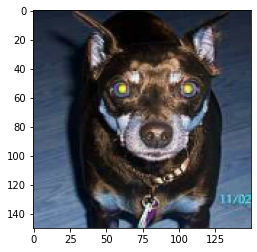

In [214]:
plt.imshow(X[100])

In [215]:
X = X / 255

In [216]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [217]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [218]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [219]:
model.fit(X,y,epochs=5,validation_split=0.1)

Epoch 1/5
57/57 [==============================] - 54s 922ms/step - loss: 0.7359 - accuracy: 0.5163 - val_loss: 0.6835 - val_accuracy: 0.6915
Epoch 2/5
57/57 [==============================] - 55s 973ms/step - loss: 0.6910 - accuracy: 0.5573 - val_loss: 0.6647 - val_accuracy: 0.5871
Epoch 3/5
57/57 [==============================] - 52s 918ms/step - loss: 0.6503 - accuracy: 0.6371 - val_loss: 0.6310 - val_accuracy: 0.5970
Epoch 4/5
57/57 [==============================] - 53s 922ms/step - loss: 0.5994 - accuracy: 0.6859 - val_loss: 0.5744 - val_accuracy: 0.7214
Epoch 5/5
57/57 [==============================] - 54s 954ms/step - loss: 0.5507 - accuracy: 0.7213 - val_loss: 0.5252 - val_accuracy: 0.7562
